**텐서(Tensor)와 NumPy의 ndarray는 유사한 개념이지만 약간의 차이가 있음**

1. **차원 지원**:
   - NumPy의 ndarray는 다양한 차원의 배열을 지원합니다. 1차원 배열, 2차원 행렬, 그 이상의 다차원 배열을 생성하고 다룰 수 있습니다.
   - 텐서는 일반적으로 3차원 이상의 다차원 배열을 가리키며, 딥러닝과 같은 머신 러닝에서 주로 사용됩니다. NumPy의 ndarray와 마찬가지로 다양한 차원의 배열을 다룰 수 있지만, 텐서는 주로 고차원 데이터를 다룰 때 사용됩니다.

2. **계산 그래프와 자동 미분**:
   - 텐서는 딥러닝 프레임워크(예: TensorFlow, PyTorch)에서 주로 사용되며, 계산 그래프를 통해 연산을 정의하고 자동 미분을 지원합니다. 이것은 딥러닝 모델을 학습하기 위해 역전파(backpropagation) 알고리즘을 구현할 때 매우 유용합니다.
   - 반면에 NumPy의 ndarray는 계산 그래프나 자동 미분을 지원하지 않습니다. 단순히 다차원 배열을 생성하고 다루는 데에 중점을 둡니다.

3. **하드웨어 가속**:
   - 텐서는 GPU 및 TPU와 같은 특수한 하드웨어 가속을 지원하여 대규모 딥러닝 모델의 학습 및 추론을 효율적으로 수행할 수 있습니다.
   - NumPy의 ndarray는 기본적으로 CPU를 사용하여 연산을 수행하며, GPU나 TPU와 같은 하드웨어 가속을 지원하지 않습니다. 하지만 일부 라이브러리는 NumPy와 호환되는 배열을 GPU에서 처리할 수 있는 기능을 제공하기도 합니다.

따라서, 텐서와 NumPy의 ndarray는 비슷한 목적을 가지고 있지만, 텐서는 주로 딥러닝에서 사용되며 그래프 기반의 연산과 자동 미분을 지원하고, 하드웨어 가속을 통해 더욱 효율적으로 계산을 수행할 수 있습니다. NumPy의 ndarray는 일반적인 다차원 배열을 다루는 데 사용되며, 머신 러닝뿐만 아니라 과학 및 엔지니어링 분야에서 널리 사용됩니다.

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

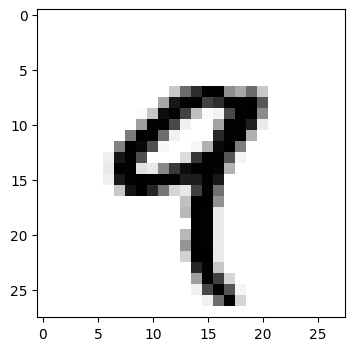

In [8]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.figure(figsize=(4,4))
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

기본적으로 Matplotlib에서는 값이 클수록 어둡게 표현됩니다. 그러나 MNIST와 같은 데이터셋을 시각화할 때는 보통 흰색 부분이 중요한 정보를 나타내므로, 흰색을 강조하기 위해 반대로 표현하는 것이 유용합니다.

따라서 cmap=plt.cm.binary을 사용하여 표시하면 값이 작을수록 (일반적으로 0에 가까울수록) 흰색으로 표시되고, 값이 클수록 어두운 색(검은색)으로 표시됩니다. 이는 원본 데이터의 흰색 부분을 강조하여 시각적으로 더 명확하게 보여줄 수 있습니다.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
# 2번쨰 층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1입니다)을 반환하는 소프트맥스 층
# 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률입니다.

In [10]:
# compile : 엮다 / 편집하다
model.compile(optimizer = 'rmsprop', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# 신경망은 입력 data의 scale에 민감 => 적절한 data 전처리 과정이 필요
# 이미지의 경우 보통 픽셀의 최댓값인 255로 나누어 사용
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [12]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 12s 22ms/step - loss: 0.2661 - accuracy: 0.9228
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.1071 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0698 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 9s 20ms/step - loss: 0.0504 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0378 - accuracy: 0.9889


 > **위의 loss와 accuracy값은 학습 과정에서의 손실 함수의 계산에 관한 것.**
 일반적으로 학습 단계에서는 훈련 데이터를 사용하여 모델의 가중치를 업데이트하고 손실 함수를 최소화합니다. 이 과정에서는 모델이 훈련 데이터에 대한 레이블을 알고 있기 때문에 손실 함수를 계산할 수 있습니다. **학습 단계에서 모델이 훈련 데이터에 대한 손실을 최소화하는 방향으로 학습되기는 하지만, 모델이 실제로 예측한 값을 알지 못합니다. 따라서 학습 과정에서는 손실 함수의 값만을 사용하여 모델의 성능을 평가할 뿐, 예측값 자체를 확인할 수는 없습니다.** 예측을 수행하고 성능을 평가하기 위해서는 학습이 완료된 모델을 사용하여 별도의 테스트 데이터셋에 대한 예측을 수행하고 이에 대한 평가를 해야 합니다. 이 과정에서는 모델이 실제로 예측한 값과 테스트 데이터셋의 레이블을 비교하여 정확도나 다른 성능 지표를 계산할 수 있습니다.

> **batch**

 배치(batch)는 한 번의 학습 과정에서 사용되는 데이터의 양을 나타냅니다. 딥러닝에서 모델을 훈련시킬 때, 전체 훈련 데이터셋을 한 번에 처리하는 것보다 데이터를 작은 배치로 나누어 처리하는 것이 일반적입니다. 이는 다음과 같은 이유로 진행됩니다:

1. **메모리 효율성**: 전체 훈련 데이터셋을 한 번에 메모리에 로드하는 것은 메모리 부족 문제를 유발할 수 있습니다. 작은 배치를 사용하면 메모리 사용량을 줄일 수 있습니다.

2. **계산 효율성**: 작은 배치를 사용하면 모델의 가중치를 업데이트하는 데 필요한 계산량을 줄일 수 있습니다. 이는 모델이 더 빠르게 훈련되도록 합니다.

3. **일반화 성능**: 작은 배치를 사용하여 모델을 훈련할 때 일종의 노이즈를 주입하여 일반화 성능을 향상시킬 수 있습니다. 이는 모델이 다양한 데이터 패턴을 학습할 수 있도록 돕습니다.

일반적으로 배치의 크기는 2의 제곱수(예: 32, 64, 128)로 설정됩니다. 이는 하드웨어의 최적화와 관련이 있으며, 배치 크기가 2의 제곱수일 때 효율적인 연산이 가능합니다. 그러나 배치 크기는 데이터셋의 크기와 모델의 구조에 따라 다르게 설정될 수 있습니다.

In [13]:
# 테스트 세트에서도 모델이 잘 작동하는지 확인
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 116ms/step


array([6.41531361e-09, 8.41995695e-10, 2.60145794e-06, 1.89847688e-05,
       1.51149857e-11, 1.91321337e-09, 1.64754549e-12, 9.99977410e-01,
       1.47049235e-08, 9.74874297e-07], dtype=float32)

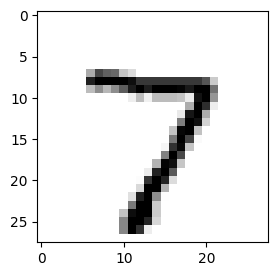

In [14]:
c = test_images[0].reshape(28,28)
plt.figure(figsize = (3,3))
plt.imshow(c, cmap = plt.cm.binary)
plt.show()

In [15]:
predictions[0].argmax()

7

In [16]:
predictions[0][7]

0.9999774

In [17]:
test_labels[0]

7

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0638 - accuracy: 0.9812


In [19]:
print('test_acc:', test_acc)

test_acc: 0.9811999797821045


### **Tensor** : 데이터를 위한 컨테이너

- 다차원 넘파이 배열
- 일반적으로는 수치형 data를 다루기에 숫자를 위한 컨테이너
- 임의의 차원 개수를 가지는 행렬의 일반화된 모습
- 텐서에서는 차원을 종종 axis 축이라고 부른다.


- 랭크-0 텐서 : 스칼라
- 랭크-1 텐서 : numpy 배열
 - 5d 텐서 는 5d 벡터와 다르다. => 5d 벡터 : 하나의 축을 따라 5개의 차원(원소)을 가진 것 // 5d 텐서 : 5개의 축을 가진 텐서
 - 차원 수 : 1. 특정 축을 따라 놓인 원소의 개수  2. 텐서의 축의 개수
 - 5차원 벡터 : 5개의 원소를 가진 numpy 배열

- 랭크-2 텐서 : 행렬

- 랭크-3 텐서 : 숫자가 채워진 직육면체 형태

- 랭크 3 텐서들을 하나의 배열로 합치면 랭크 4 텐서를 만드는 식으로 이어짐

In [20]:
# mnist data set에서의 tensor
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
train_images.ndim

3

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
train_images.dtype

dtype('uint8')

In [24]:
# Slicing
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

#### **텐서 Tensor**

> 텐서를 사용하는 이유는 다양한 형태의 데이터를 효과적으로 표현할 수 있기 때문입니다.

1. **다양한 데이터 유형 표현**: 이미지, 텍스트, 오디오 등 다양한 유형의 데이터를 하나의 일반적인 구조로 표현할 수 있습니다. 예를 들어, 이미지는 3D 텐서로 표현되지만, 텍스트는 2D 또는 3D 텐서로 표현될 수 있습니다. 이러한 다양한 데이터를 텐서로 통합하여 처리할 수 있습니다.

2. **고차원 데이터 표현**: 이미지나 비디오와 같은 고차원 데이터를 효과적으로 표현할 수 있습니다. 이러한 데이터는 텐서의 고차원 축을 사용하여 각 차원이 다른 특징을 나타내도록 설계됩니다.

3. **효율적인 연산**: 텐서 연산은 병렬 처리에 최적화되어 있습니다. 따라서 텐서를 사용하면 대규모 데이터셋에서의 연산을 효율적으로 수행할 수 있습니다.

4. **신경망 모델의 입력 및 출력 형식**: 신경망 모델은 주로 텐서 형식의 입력 및 출력을 사용합니다. 따라서 데이터를 텐서로 표현하면 신경망 모델과의 통합이 쉽습니다.

이러한 이유로 텐서는 다양한 형태의 데이터를 효율적으로 표현하고 처리하는 데에 매우 유용합니다. 따라서 데이터를 텐서로 표현하는 것은 많은 데이터 과학 및 기계 학습 작업에서 표준적인 방법 중 하나입니다.

### 텐서 연산

### **1. Numpy ndarray를 활용한 원소별 연산**

In [25]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [26]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [27]:
# Numpy의 ndarray를 활용해서.. 원소별 연산 vs python 시간 비교
import time
import numpy as np
# 0부터 1사이의 랜덤한 실수로 채워진 크기가 (20,100)인 2차원 배열 생성
x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
z = x + y
z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format((time.time() - t0)*100))

걸린 시간: 0.03 s


In [28]:
# 단순한 연산
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 4.58 s


### **2. 브로드캐스팅**
- 크기가 다른 두 텐서가 더해질 때

In [29]:
import numpy as np
X = np.random.random((32,10))
y = np.random.random((10,))

In [30]:
# 1. 큰 텐서의 차원에 맞추기 위해 작은 텐서의 축(broadcasting 축)이 추가됨
# 2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복
y = np.expand_dims(y,axis = 0) # axis=0은 새로운 축을 추가할 위치를 지정

In [31]:
y.shape

(1, 10)

In [32]:
y

array([[0.2303826 , 0.73585753, 0.9209702 , 0.75077572, 0.55596826,
        0.13338486, 0.89835915, 0.79191298, 0.13492824, 0.66235766]])

In [33]:
# X와 Y의 크기를 맞춰준다.
Y = np.concatenate([y] * 32, axis=0)
# concatenate : 배열을 연결
# y 배열을 32번 반복한 후, 이를 행 방향(axis=0)으로 연결하는 작업

In [34]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

### **assert**

- 프로그램의 특정 조건이 참임을 검증하는 데 사용됩니다. 주로 디버깅과 테스트 목적으로 사용되며, 코드가 실행될 때 조건이 참이 아니면 AssertionError를 발생시킵니다. 이는 프로그램이 예상대로 작동하지 않을 때 해당 지점을 식별하고 디버깅하는 데 도움이 됩니다.

### **concatenate()**
- 배열을 연결할 때는 연결하려는 배열들의 형태(shape)가 일치해야 합니다.
- 여러 배열을 하나의 배열로 연결하는 데 사용됩니다.
  1. arrays: 연결할 배열들의 시퀀스입니다. 이는 리스트, 튜플 또는 배열의 시퀀스일 수 있습니다.
  2. axis: 연결할 축을 지정합니다. 기본값은 0으로, 첫 번째 축(행 방향)을 의미합니다. 다른 축을 지정할 수도 있습니다.

```python
import numpy as np

a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
result = np.concatenate([a, b], axis=0)
'''
array([[1, 2],
       [3, 4],
       [5, 6]])
'''
# 위의 코드는 axis = 1로는 실행 불가
# 배열 a는 (2, 2) 모양의 2차원 배열이며, 배열 b는 (1, 2) 모양의 2차원 배열입니다.
# 따라서 두 배열을 행 방향(axis=0)으로 연결할 수는 있지만, 열 방향(axis=1)으로는 연결할 수 없습니다.

a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [6,7]])
result = np.concatenate([a, b], axis=1)
'''
array([[1, 2, 5, 6],
       [3, 4, 6, 7]])
'''

# axis = 0
a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])
result = np.concatenate((a, b), axis=0)
'''
array([[1, 2, 3],
       [4, 5, 6]])
'''
# axis = 1
result = np.concatenate((a, b), axis=1)
'''
array([[1, 2, 3, 4, 5, 6]])
'''
```



In [35]:
# numpy의 broadcasting으로 크기가 다른 두 텐서에 브로드캐스팅으로 원소별 maximum 연산 적용 가능
import numpy as np
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y)

In [36]:
z.shape

(64, 3, 32, 10)

### **3. 텐서 곱셈 ; dot product**

In [37]:
# 텐서 곱셈 : 가장 널리 쓰이는 텐서 연산
# * : 원소별 곱셈
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

10.689524951113034

In [38]:
len(x.shape)

1

In [39]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z
    # 원소 개수가 같은 벡터끼리 점곱이 가능

In [40]:
# y와 x의 행 사이에서 점곱이 일어나면 벡터가 반환
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [41]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [42]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

> **(a,b,c,d) shape의 4차원 텐서와 (d,)shape의 1차원 텐서의 내적**

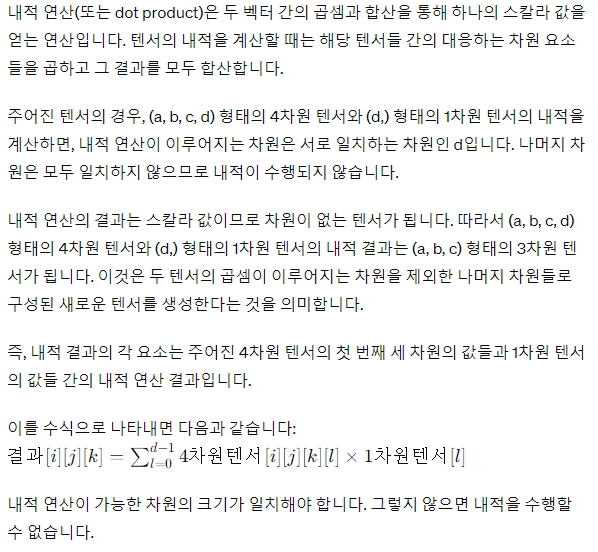

> **(a,b,c,d)와 (d,e)의 내적**

두 텐서의 내적을 계산하기 위해서는 내적 연산이 이루어지는 차원의 크기가 일치해야 합니다. 주어진 텐서의 경우, 첫 번째 텐서의 마지막 차원과 두 번째 텐서의 첫 번째 차원의 크기가 일치해야 내적 연산이 가능합니다.

따라서 (a, b, c, d)와 (d, e)의 내적을 계산하면, 내적 연산이 이루어지는 차원은 d입니다. 그러나 나머지 차원의 크기는 일치하지 않습니다. 따라서 내적을 계산할 수 없습니다.

내적 연산이 가능한 경우, 결과는 두 텐서의 차원 크기를 조합하여 새로운 텐서를 생성합니다. 이 경우에는 (a, b, c, e) 형태의 텐서가 생성됩니다.

내적 연산이 가능한지 여부는 텐서의 형태와 크기에 따라 달라집니다. 내적 연산을 수행할 때는 주어진 텐서들의 차원 크기를 주의깊게 확인해야 합니다.

> **첫번째 텐서의 마지막 차원을 제외한 나머지 차원의 크기가 두번째 차원의 첫번재 차원의 크기와 일치하는 것이 내적의 가능 여부에 영향을 미치지 않습니다.** 내적 연산은 두 텐서의 대응하는 차원 요소들을 곱하고 그 결과를 모두 합산하여 하나의 스칼라 값을 얻는 연산입니다. 이 때, 내적 연산이 이루어지는 차원은 두 텐서의 마지막 차원과 첫 번째 차원입니다. 다른 차원의 크기는 연산에 영향을 미치지 않습니다. 그러므로 마지막 차원을 제외한 다른 모든 차원에서는 크기가 같을 필요가 없습니다. 나머지 차원의 크기는 같지 않아도 내적 연산은 가능합니다.


- 내적 연산을 수행할 때에는 내적이 이루어지는 차원의 크기가 같아야 하고, 나머지 차원의 크기는 일치하지 않아도 상관없습니다. 내적 연산은 내적이 이루어지는 차원을 제외한 나머지 차원에서 각 요소별로 계산되기 때문에, 다른 차원의 크기가 같은지 여부는 내적 연산의 가능 여부에 영향을 미치지 않습니다.

예를 들어, (a, b, c, d)와 (d, e)의 내적 연산에서는 내적이 이루어지는 차원인 d의 크기가 일치해야 하지만, 나머지 차원인 a, b, c와 e의 크기는 다를 수 있습니다.

이러한 특성은 텐서 연산의 유연성을 제공하며, 다양한 크기와 형태의 텐서를 다룰 수 있도록 도와줍니다.


### **4. 텐서 크기 변환**

- 크기가 변환되어도, 원래 텐서과 원소 개수는 동일

In [43]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [44]:
x = x.reshape((6,1))

In [45]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [46]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [47]:
# 전치 trasposition : 행렬의 행과 열을 바꾸는 것
# x[i,:] => x[:, i]
x = np.zeros((300,20))
x = np.transpose(x)
x.shape

(20, 300)

> **transpose 전치**

 numpy의 `transpose` 함수는 2차원 배열에 대해서 주로 사용되지만, 그 이상의 차원에 대해서도 적용할 수 있습니다. 다차원 배열에서 `transpose` 함수를 사용하면 배열의 축을 바꾸거나 전치할 수 있습니다. 예를 들어, 3차원 배열의 경우에는 축의 순서를 변경하여 데이터를 재배열할 수 있습니다. 이것은 특히 이미지 데이터와 같이 다차원의 데이터를 다룰 때 유용합니다.

예를 들어, 3차원 배열 `arr`이 있다고 가정해보겠습니다. 이 배열에서 축의 순서를 변경하여 전치된 배열을 얻고 싶다면 `transpose` 함수를 사용할 수 있습니다.

```python
import numpy as np

# 3차원 배열 생성
arr = np.random.rand(2, 3, 4)  # shape: (2, 3, 4)

# 축 순서 변경하여 전치된 배열 얻기
transposed_arr = np.transpose(arr, axes=(1, 2, 0))  # shape: (3, 4, 2)
```

위 코드에서 `axes` 매개변수는 원하는 축의 순서를 지정합니다. 따라서 `axes=(1, 2, 0)`은 첫 번째 축을 두 번째로, 두 번째 축을 세 번째로, 세 번째 축을 첫 번째로 이동시키는 것을 의미합니다. 이렇게 함으로써 배열의 축을 원하는 방식으로 재배열할 수 있습니다.

그러나 주의할 점은 축의 순서를 잘못 지정할 경우 데이터가 제대로 변환되지 않을 수 있습니다. 따라서 `transpose` 함수를 사용할 때는 축의 순서를 신중하게 결정해야 합니다.


In [48]:
# 3차원 배열 생성
arr = [[[0],[1],[2],[3]],[[4],[5],[6],[7]],[[8],[9],[10],[11]]]
# shape(arr) (3,4,1)

# 축 순서 변경하여 전치된 배열 얻기
transposed_arr = np.transpose(arr, axes=(1, 2, 0))
transposed_arr

array([[[ 0,  4,  8]],

       [[ 1,  5,  9]],

       [[ 2,  6, 10]],

       [[ 3,  7, 11]]])

> - (3,4,1) 에서
- 3은, 배열의 "행"의 수
- 4는 배열의 "열"의 수
- 1은 배열의 "깊이"

- 이때, 0은 기존 배열의 1열, 1행, 1깊이에 있어서 그렇고, 4은 기존 배열의 1열 2행 1깊이에 있음
- **transpose 함수의 axes 매개변수에 지정된 값은 기존 배열의 차원의 우선순위를 결정하는 데 중요한 역할을 합니다.**
- 예를 들어, (1, 2, 0)은 세 개의 차원을 가진 배열에서 첫 번째 차원을 두 번째로, 두 번째 차원을 세 번째로, 세 번째 차원을 첫 번째로 이동시키는 것을 의미합니다. 따라서 전치된 배열에서 각 요소들이 배치될 때 기존 배열의 각 차원의 우선순위가 변경되는 것입니다.

In [49]:
arr

[[[0], [1], [2], [3]], [[4], [5], [6], [7]], [[8], [9], [10], [11]]]

In [50]:
np.array(arr).shape

(3, 4, 1)

In [51]:
np.array(transposed_arr).shape

(4, 1, 3)

### **2.5 텐서 연산의 기하학적 해석**

- 새로운 위치에서 전체 객체의 복사본을 만드는 역할
- 텐서 덧셈 : 객체를 특정 방향으로 특정 양만큼 이동하는 행동을 나타냄

> 아핀 변환은 선형 변환과 벡터를 더해 얻는 이동의 조합으로 만들어지는 변환을 의미하는데, 이는 활성화 함수를 사용하지 않는 변환과 같음

- 이때, 활성화 함수가 없는 dense 층을 여러 개 붙이면, 이는 심층 신경망으로 위장한 하나의 선형 model일 뿐이다.
- 그래서 딥러닝에서는 활성화 함수를 도입해서, 매우 복잡하고 비선형적인 기하학적 변형을 구현하며 심층 신경망에 매우 풍부한 가설 공간을 제공한다.
- 심층 신경망의 각 층은 데이터를 조금씩 풀어주는 변환을 적용하므로 이런 층을 깊게 쌓으면 아주 복잡한 분해 과정을 처리할 수 있다.

### **신경망의 엔진: 그레이디언트 기반 최적화**

- gradient를 사용하면 모델 가중치를 여러 방향으로 이동했을 때 손실이 얼만큼 변하는 지 설명 가능
- gradient 계산하면 손실이 감소하는 방향으로 가중치를 한 번에 하나씩이 아닌 한 번의 업데이트로 전체 가중치를 동시에 이동 가능
- **gradient : tensor 연산의 도함수**, 텐서를 입력으로 받는 함수의 기울기 == **다차원 표면의 곡률 curvature**


> 고차원 공간에서는 대부분 안장점(saddle point)로 나타나고 지역 최솟값은 매우 드물다.

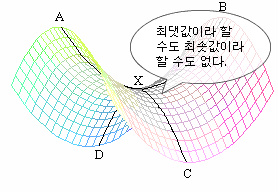

> **momentum**
- 일반적으로는 0.9를 많이 사용하고,주로 tensorflow의 sgd = optimizers.SGD(lr = 0.01, momentum = 0.9)와 같이 SGD객체를 생성하여 직접 전달해야 함

### **역전파 알고리즘 backpropagation**
- **함수가 모두 선형 변환으로만 이루어진 것이 아니라 층 사이사이에 활성화 함수가 있어, 비선형의 복잡한 변환이기에, 이러한 모델의 가중치에 대한 손실의 그래디언트를 구하려면 역전파 알고리즘이 필요하다.**

역전파(backpropagation) 알고리즘은 심층 신경망(deep neural network)에서 사용되는 가중치 업데이트를 위한 최적화 알고리즘입니다. 이 알고리즘은 네트워크의 출력과 실제 값 사이의 오차를 계산하고, 이 오차를 각 뉴런의 가중치에 대한 편미분을 통해 역방향으로 전파하여 가중치를 조정합니다. 이 과정은 경사 하강법(gradient descent)과 함께 사용되어 네트워크가 오차를 최소화하도록 가중치를 조정합니다.

역전파 알고리즘의 주요 단계는 다음과 같습니다:

1. **순전파(Forward Pass):** 입력 데이터를 네트워크에 전달하고, 각 층에서의 연산을 수행하여 출력을 계산합니다. 이 과정에서 중간 결과 및 활성화 함수의 출력을 저장합니다.

2. **손실 함수 계산:** 출력과 실제 값 사이의 오차를 계산하기 위해 손실 함수(loss function)를 사용합니다. 손실 함수는 모델의 예측과 실제 값 사이의 차이를 측정하는 함수입니다.

3. **역전파(backward Pass):** 손실 함수의 그레이디언트(기울기)를 계산하기 위해 역전파 알고리즘을 사용합니다. 이를 위해 출력층부터 시작하여 각 층의 가중치와 편향에 대한 손실 함수의 편미분을 계산합니다. **이 편미분은 체인 룰(chain rule)을 사용하여 계산됩니다.**

4. **가중치 업데이트:** 역전파 알고리즘을 사용하여 계산된 그레이디언트를 사용하여 가중치를 업데이트합니다. 이는 경사 하강법(gradient descent) 또는 그 변형을 사용하여 수행됩니다. 가중치는 그레이디언트의 반대 방향으로 조정되어 손실 함수를 최소화하도록 합니다.

5. **반복:** 위의 과정을 반복하여 네트워크가 손실 함수를 최소화하도록 가중치를 조정합니다. 이러한 반복은 학습이 완료될 때까지 계속됩니다.

- 역전파 알고리즘은 딥러닝 모델에서 학습을 위한 핵심 알고리즘 중 하나이며, 네트워크의 가중치를 업데이트하여 손실 함수를 최소화하는 방향으로 모델을 학습시킵니다.


### 텐서플로의 그레이디언트 테이프 : 텐서플로의 강력한 자동 미분 기능 활용 API

- gradient tape :  파이썬의 with문과 함께 사용하여 해당 코드 블록 안의 모든 텐서 연산을 계산 그래프 형태로 기록

In [52]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
  y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y,x) # tape를 사용해서 변수 x에 대한 출력 y의 그래디언트를 계산
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [53]:
x = tf.Variable(tf.zeros((2,2)))
with tf.GradientTape() as tape:
  y = 2*x + 3
grad_of_y_wrt_x = tape.gradient(y,x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [54]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.8988913, 1.8988913],
        [1.4891639, 1.4891639]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

### **역전파 알고리즘**
- 역전파(Backpropagation) 알고리즘은 손실 함수를 줄이는 방향으로 모든 가중치를 한 번에 조절
- 손실 함수의 그래디언트(기울기)를 계산하여 역전파 알고리즘을 통해 각 가중치와 편향에 대한 손실 함수의 기울기를 계산
- 경사하강법(Gradient Descent): 계산된 기울기를 사용하여 가중치와 편향을 조절합니다. 경사하강법은 기울기가 감소하는 방향으로 가중치를 업데이트하여 손실 함수를 최소화합니다.

#### **첫 번째 예제 다시 살펴보기**

In [55]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [56]:
model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

**Dense 레이어는 입력과 출력을 모두 연결해줍니다.** 예를 들어 입력 뉴런이 4개, 출력 뉴런이 8개있다면 총 연결선은 32개(4*8=32) 입니다. 각 연결선에는 가중치(weight)를 포함하고 있는데, 이 가중치가 나타내는 의미는 연결강도라고 보시면 됩니다. 현재 연결선이 32개이므로 가중치도 32개입니다.

가중치가 높을수록 해당 입력 뉴런이 출력 뉴런에 미치는 영향이 크고, 낮을수록 미치는 영향이 적다.

 예를 들어 성별을 판단하는 문제있어서, 출력 뉴런의 값이 성별을 의미하고, 입력 뉴런에 머리카락길이, 키, 혈핵형 등이 있다고 가정했을 때, 머리카락길이의 가중치가 가장 높고, 키의 가중치가 중간이고, 혈핵형의 가중치가 가장 낮을 겁니다. 딥러닝 학습과정에서 이러한 가중치들이 조정됩니다.

이렇게 입력 뉴런과 출력 뉴런을 모두 연결한다고 해서 전결합층이라고 불리고, 케라스에서는 Dense라는 클래스로 구현이 되어 있습니다. 아래는 Dense 클래스 사용 예제입니다.

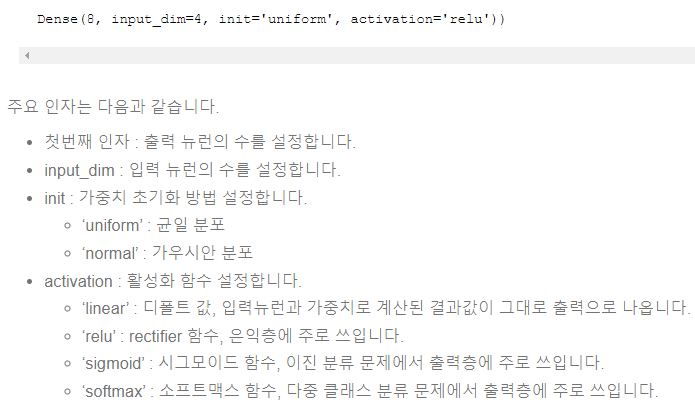

Dense 레이어는 입력 뉴런 수에 상관없이 출력 뉴런 수를 자유롭게 설정할 수 있기 때문에 출력층으로 많이 사용됩니다. 이진 분류문제에서는 0과 1을 나타내는 출력 뉴런이 하나만 있으면 되기 때문에 아래 코드처럼 출력 뉴런이 1개이고, 입력 뉴런과 가중치를 계산한 값을 0에서 1사이로 표현할 수 있는 활성화 함수인 sigmoid을 사용합니다.

In [57]:
# model.compile() 메서드는 모델을 학습 가능한 상태로 조립하거나 준비하는 과정을 의미합니다.
# 이 과정에서 모델의 구성 요소들이 엮이고 조립되어 학습할 수 있는 상태로 만들어집니다.
# 이러한 과정에서 옵티마이저, 손실 함수 및 평가 지표 등을 설정하여 모델을 완전히 구성하게 됩니다.
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

>-  categorical_crossentropy의 경우, [[0,1,0],[0,0,1]]과 같은 원핫벡터 형태
- sparse_categorical_crossentropy의 경우 y_true = [1,2]와 같은 정수 형태

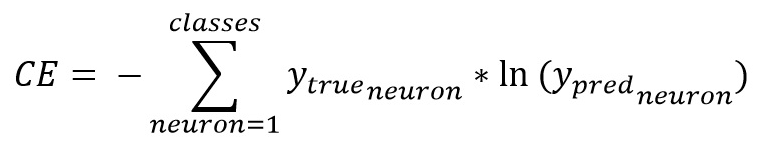

> `model.compile()`은 Keras에서 모델을 컴파일하는 메서드입니다. 이 메서드는 모델을 학습 가능한 상태로 준비하기 위해 필요한 몇 가지 설정을 지정합니다. `compile()` 함수는 세 가지 중요한 매개변수를 받습니다:

1. **optimizer (옵티마이저):** 옵티마이저는 모델이 사용하는 최적화 알고리즘을 결정합니다. 최적화 알고리즘은 모델이 손실 함수를 최소화하도록 가중치를 조정하는 방법을 결정합니다.

2. **loss (손실 함수):** 손실 함수는 모델의 예측과 실제 값 사이의 차이를 계산합니다. 모델이 학습하는 동안 이 손실이 최소화되도록 합니다. 다중 클래스 분류, 이진 분류, 회귀 등에 따라 다양한 손실 함수를 선택할 수 있습니다.

3. **metrics (평가 지표):** 모델의 성능을 측정하는 데 사용되는 지표입니다. 주로 훈련 및 검증 데이터에 대한 정확도, 정밀도, 재현율 등을 모니터링하기 위해 사용됩니다.

이러한 세 가지 매개변수를 사용하여 `compile()` 함수를 호출하면 모델을 학습 가능한 상태로 준비해준다.모델을 컴파일하는 과정은 실제로 모델을 실행하기 전에 필요한 중요한 단계입니다.

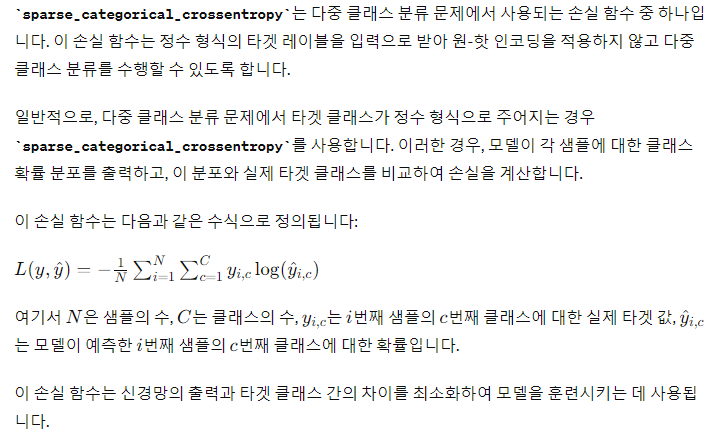

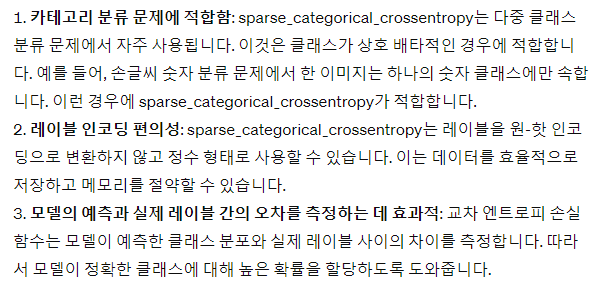

=> **sparse_categorical_crossentropy값은 정답하고 가까워야 log 1에 가까워져서 전체 값이 작아짐**

In [59]:
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0289 - accuracy: 0.9917
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0221 - accuracy: 0.9936
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0169 - accuracy: 0.9954
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0129 - accuracy: 0.9965
Epoch 5/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0100 - accuracy: 0.9976
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0073 - accuracy: 0.9982
Epoch 7/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0056 - accuracy: 0.9988
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0033 - accuracy: 0.9995
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0024 - accuracy: 0.9996
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0015 - accuracy

역전파 알고리즘에서는 각 배치(batch)를 처리할 때마다 가중치가 업데이트되고, 이에 따라 그래디언트도 변경됩니다.

배치 경사하강법(Batch Gradient Descent)의 경우, 전체 데이터셋에 대한 손실 함수의 그래디언트를 계산하고 이를 사용하여 가중치를 업데이트합니다. 이로 인해 각 배치를 처리할 때마다 가중치는 일관된 방향으로 업데이트되며, 그래디언트는 다음 배치에 영향을 줍니다.

미니 배치 경사하강법(Mini-batch Gradient Descent)의 경우, 전체 데이터셋을 작은 배치로 나누어 각 배치에 대한 손실 함수의 그래디언트를 계산하고 가중치를 업데이트합니다. 이로 인해 각 배치를 처리할 때마다 가중치는 일관된 방향으로 업데이트되며, 그래디언트는 다음 배치에 영향을 줍니다.

> ### **텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기**


In [62]:
# 단순한 Dense 클래스

import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

> **`@property'**

`@property` 데코레이터는 파이썬에서 getter 메서드를 정의하는 방법 중 하나입니다. 이를 사용하면 해당 메서드를 객체의 속성처럼 접근할 수 있습니다. 여기에는 몇 가지 중요한 점이 있습니다:

1. **속성의 읽기 전용으로 정의**: `@property`를 사용하여 정의된 메서드는 읽기 전용 속성을 정의합니다. 이는 해당 속성에 값을 할당할 수 없고, 읽기만 가능합니다.
   
2. **메서드 이름으로 속성 접근**: `@property`로 정의된 메서드는 해당 클래스의 인스턴스를 통해 메서드 이름을 사용하여 속성에 접근할 수 있습니다. 메서드 이름을 호출함으로써 메서드의 반환 값을 얻을 수 있습니다.

예를 들어:

```python
class MyClass:
    def __init__(self):
        self._my_property = None

    @property
    def my_property(self):
        return self._my_property

    @my_property.setter
    def my_property(self, value):
        self._my_property = value
```

위 코드에서 `@property` 데코레이터를 사용하여 `my_property`라는 속성을 정의하고, 그 아래에 `my_property` 메서드를 정의합니다. 이 메서드는 읽기 전용 속성을 반환합니다. 그리고 `@my_property.setter` 데코레이터를 사용하여 이 속성의 setter 메서드를 정의합니다. 이제 `my_property` 속성에 접근하려면 이 메서드를 사용하여 값을 설정하거나 가져올 수 있습니다.

> **@my_property.setter**

@my_property.setter는 @property로 정의된 속성의 setter 메서드를 정의하는 데코레이터입니다. 이를 사용하여 속성에 값을 할당할 때 실행되는 메서드를 정의할 수 있습니다.

예를 들어, 이전의 예제에서 my_property 속성에 값을 할당하려면 setter 메서드가 필요합니다. @my_property.setter를 사용하여 setter 메서드를 정의하면 됩니다. 이 메서드의 이름은 @property로 정의된 메서드와 같아야 합니다. 그러나 인수를 하나 더 받아야 하며, 이는 속성에 할당되는 값입니다.

In [68]:
# 단순한 Sequential 클래스
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [69]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [72]:
model.weights

[<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32, numpy=
 array([[0.00934707, 0.07426419, 0.05442108, ..., 0.07264771, 0.0416401 ,
         0.04567055],
        [0.07587027, 0.05754838, 0.01804019, ..., 0.05426326, 0.04972947,
         0.06418091],
        [0.02467574, 0.08389445, 0.07639217, ..., 0.08609616, 0.04833361,
         0.08690572],
        ...,
        [0.0016525 , 0.00850152, 0.07874947, ..., 0.00189676, 0.07503673,
         0.07561922],
        [0.00147613, 0.00327289, 0.02952131, ..., 0.09086042, 0.02326689,
         0.01716321],
        [0.08814164, 0.07075015, 0.06050571, ..., 0.03989661, 0.07667115,
         0.09251427]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0

> **TensorFlow의 reduce_mean() 메서드는 여러 값을 평균을 내어 단일 값으로 줄이는 작업을 수행**

`reduce_mean()` 메서드는 TensorFlow에서 텐서의 평균을 계산하는 함수입니다. 이 함수는 텐서의 모든 원소에 대한 평균을 계산합니다.

주요 매개변수는 다음과 같습니다:

- **input_tensor**: 평균을 계산할 텐서입니다.
- **axis**: 평균을 계산할 축을 지정하는 옵션 매개변수입니다. 기본값은 `None`이며, 이 경우 모든 차원에 대해 평균을 계산합니다. 만약 특정 축을 지정하면 해당 축을 따라 평균을 계산합니다.
- **keepdims**: 차원을 유지할지 여부를 결정하는 옵션 매개변수입니다. 기본값은 `False`이며, 이 경우 평균을 계산한 후 결과 텐서의 차원 중 크기가 1인 차원은 제거됩니다. 만약 `True`로 설정하면 평균을 계산한 후에도 결과 텐서의 차원을 유지합니다.

예를 들어:

```python
import tensorflow as tf

# 입력 텐서 생성
input_tensor = tf.constant([[1.0, 2.0, 3.0],
                            [4.0, 5.0, 6.0]])

# 모든 원소에 대한 평균 계산
mean_all = tf.reduce_mean(input_tensor)
print("전체 평균:", mean_all.numpy())  # 출력: 3.5

# 각 열에 대한 평균 계산
mean_column = tf.reduce_mean(input_tensor, axis=0)
print("각 열의 평균:", mean_column.numpy())  # 출력: [2.5 3.5 4.5]

# 각 행에 대한 평균 계산
mean_row = tf.reduce_mean(input_tensor, axis=1)
print("각 행의 평균:", mean_row.numpy())  # 출력: [2. 5.]
```

이 예제에서는 입력 텐서의 모든 원소에 대한 평균을 계산한 후, 각 열과 각 행에 대한 평균을 계산하는 방법을 보여줍니다.

In [73]:
# batch generator
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [83]:
# 훈련 스텝 실행하기

def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [76]:
learning_rate = 1e-3
def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

**RMSprop**은 경사 하강법(Gradient Descent)의 한 변종입니다. RMSprop은 Adagrad(Adaptive Gradient Algorithm)의 변형으로, 네번째 배치의 제곱 그라디언트의 지수 가중 이동 평균을 사용하여 학습률을 조정합니다. 이렇게 함으로써 학습률이 각 매개변수에 따라 다르게 적용되어 더 안정적인 최적화를 도와줍니다.

SGD(Stochastic Gradient Descent)는 경사 하강법의 가장 기본적인 형태이며, 각 단계에서 단일 샘플 또는 일부 샘플에 대한 그라디언트를 사용하여 모델 매개변수를 업데이트합니다. RMSprop은 이보다 더 발전된 방법으로, 각 매개변수의 업데이트 속도를 개별적으로 조절하여 학습률을 동적으로 조정합니다.

따라서 RMSprop은 경사 하강법의 한 종류이며, SGD의 일부 방법으로 볼 수 있습니다.

**Adagrad(Adaptive Gradient Algorithm)**는 기울기 기반 최적화 알고리즘 중 하나로, 각 매개변수에 대해 맞춤형 학습률을 적용하여 학습률을 자동으로 조절합니다. Adagrad는 경사의 크기에 따라 학습률을 조절하여 많이 변화한 매개변수에 대해 작은 학습률을 적용하고, 적게 변화한 매개변수에 대해 큰 학습률을 적용합니다.

Adagrad의 특징은 다음과 같습니다:

맞춤형 학습률: 각 매개변수마다 학습률을 개별적으로 조절하여 최적화 과정을 안정화시킵니다.
희소한 그라디언트 처리: 희소한 데이터나 자주 발생하지 않는 기울기에 대해 더 많은 업데이트를 수행하고, 빈번한 기울기에 대해서는 작은 업데이트를 수행합니다.
학습률 감쇠: 학습이 진행됨에 따라 학습률을 감소시키는 학습률 스케줄링을 자동으로 적용하여 안정적인 학습을 돕습니다.
Adagrad는 초기에는 잘 작동하지만, 학습이 계속되면서 학습률이 지나치게 감소하여 학습이 멈추는 경우가 발생할 수 있습니다. 이러한 단점을 극복하기 위해 Adadelta, RMSprop, Adam과 같은 변형된 최적화 알고리즘이 개발되었습니다.

In [80]:
# 전체 훈련 loop
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [84]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 4.70
100번째 배치 손실: 2.20
200번째 배치 손실: 2.20
300번째 배치 손실: 2.09
400번째 배치 손실: 2.17
에포크 1
0번째 배치 손실: 1.90
100번째 배치 손실: 1.84
200번째 배치 손실: 1.81
300번째 배치 손실: 1.70
400번째 배치 손실: 1.78
에포크 2
0번째 배치 손실: 1.57
100번째 배치 손실: 1.54
200번째 배치 손실: 1.47
300번째 배치 손실: 1.41
400번째 배치 손실: 1.47
에포크 3
0번째 배치 손실: 1.32
100번째 배치 손실: 1.31
200번째 배치 손실: 1.21
300번째 배치 손실: 1.20
400번째 배치 손실: 1.25
에포크 4
0번째 배치 손실: 1.12
100번째 배치 손실: 1.13
200번째 배치 손실: 1.03
300번째 배치 손실: 1.04
400번째 배치 손실: 1.09
에포크 5
0번째 배치 손실: 0.98
100번째 배치 손실: 0.99
200번째 배치 손실: 0.89
300번째 배치 손실: 0.92
400번째 배치 손실: 0.97
에포크 6
0번째 배치 손실: 0.87
100번째 배치 손실: 0.89
200번째 배치 손실: 0.79
300번째 배치 손실: 0.83
400번째 배치 손실: 0.89
에포크 7
0번째 배치 손실: 0.79
100번째 배치 손실: 0.81
200번째 배치 손실: 0.71
300번째 배치 손실: 0.76
400번째 배치 손실: 0.82
에포크 8
0번째 배치 손실: 0.73
100번째 배치 손실: 0.74
200번째 배치 손실: 0.65
300번째 배치 손실: 0.71
400번째 배치 손실: 0.77
에포크 9
0번째 배치 손실: 0.68
100번째 배치 손실: 0.69
200번째 배치 손실: 0.60
300번째 배치 손실: 0.67
400번째 배치 손실: 0.73


In [86]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.81
